In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# import plotly_express as px 
# import plotly.graph_objs as go
# import plotly.offline as py 
# from plotly.offline import plot, iplot, init_notebook_mode 
# from plotly.subplots import make_subplots 
# import plotly.subplots as sp 
from scipy import stats 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 

In [3]:
upset_count = pd.read_csv("mm_data/Upset Count.csv")

In [4]:
print(upset_count.head())
print(upset_count.shape)

   YEAR  FIRST ROUND  SECOND ROUND  SWEET 16  ELITE 8  FINAL 4  TOTAL
0  2023            5             4         3        2        0     14
1  2022            7             5         4        0        1     17
2  2021            9             6         2        1        0     18
3  2019            8             0         1        2        0     11
4  2018            6             5         3        1        0     15
(15, 7)


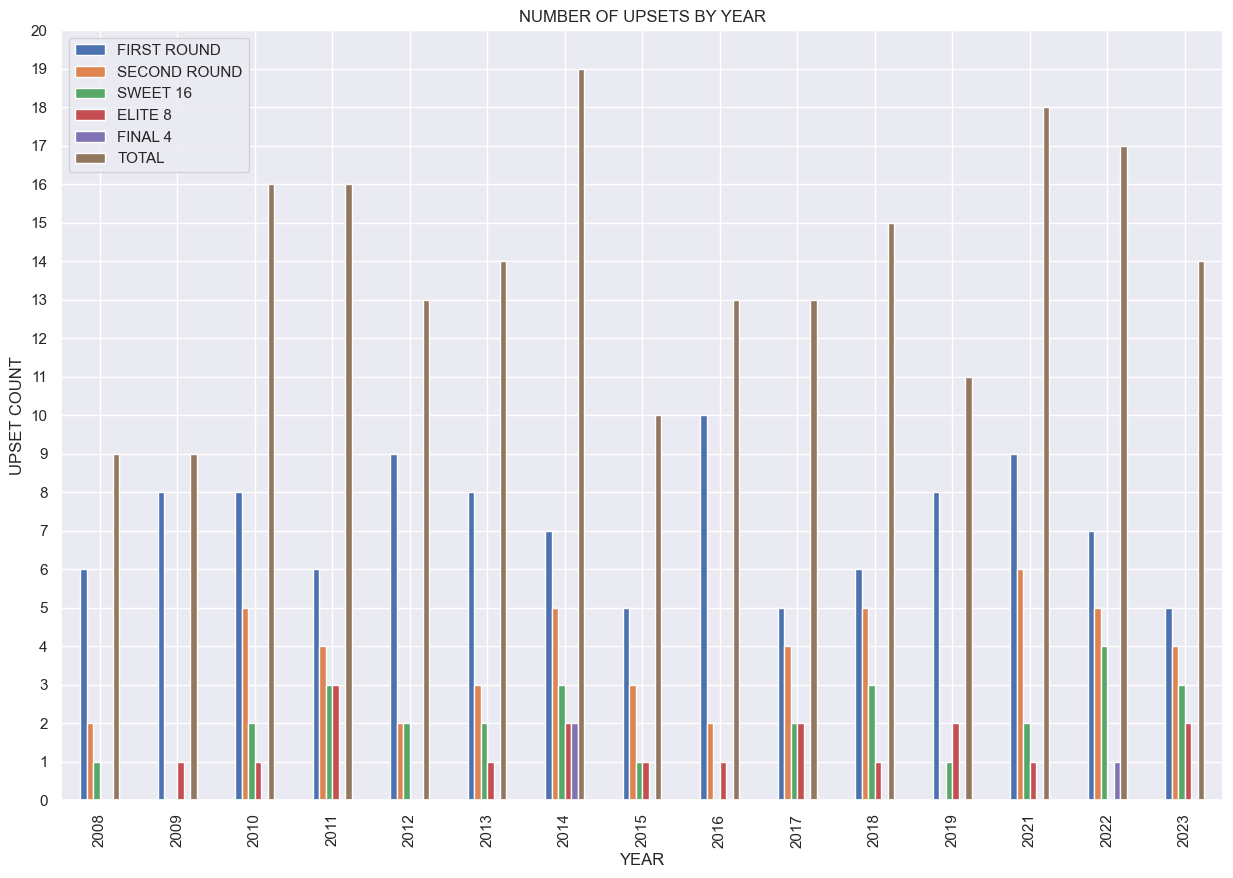

In [5]:
sns.set_theme(rc = {'figure.figsize' : (15, 10)})
upsets_count = upset_count.iloc[:: - 1]
selected_columns = upsets_count.columns
upsets_count[selected_columns].plot(x = 'YEAR', kind = 'bar', stacked = False, title = 'NUMBER OF UPSETS BY YEAR') 
plt.yticks(np.arange(21))
plt.ylabel('UPSET COUNT'); 

In [6]:
upset_seeds = pd.read_csv("mm_data/Upset Seed Info.csv")

In [7]:
upset_seeds.head()

,YEAR,CURRENT ROUND,SEED WON,SEED LOST,SEED DIFF
0,2023,64,13,4,9
1,2023,64,15,2,13
2,2023,64,16,1,15
3,2023,64,11,6,5
4,2023,64,10,7,3


In [8]:
matchups = pd.read_csv("mm_data/Tournament Matchups.csv")

In [9]:
matchups.head()

,YEAR,BY YEAR NO,BY ROUND NO,TEAM NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE
0,2024,2034,NaN,1033,Purdue,1,1,64,NaN
1,2024,2033,NaN,1032,Quinnipiac,16,64,64,NaN
2,2024,2032,NaN,1065,Connecticut,1,1,64,NaN
3,2024,2031,NaN,1026,South Dakota St.,16,64,64,NaN
4,2024,2030,NaN,1053,Houston,1,1,64,NaN


In [10]:
matchups = matchups[matchups['YEAR'] != 2024]
matchups.head()

,YEAR,BY YEAR NO,BY ROUND NO,TEAM NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE
146,2023,1888,1888.0,1011,Alabama,1,16,64,96.0
147,2023,1887,1887.0,955,Texas A&M Corpus Chris,16,64,64,75.0
148,2023,1886,1886.0,979,Maryland,8,32,64,67.0
149,2023,1885,1885.0,945,West Virginia,9,64,64,65.0
150,2023,1884,1884.0,961,San Diego St.,5,2,64,63.0


In [11]:
matchups['GAME ID'] = (matchups.index // 2) + 1

In [12]:
matchups['OUTCOME'] = ''

round_64 = matchups.loc[matchups['CURRENT ROUND'] == 64] 
round_32 = matchups.loc[matchups['CURRENT ROUND'] == 32] 
sweet_16 = matchups.loc[matchups['CURRENT ROUND'] == 16] 
elite_8 = matchups.loc[matchups['CURRENT ROUND'] == 8] 
final_4 = matchups.loc[matchups['CURRENT ROUND'] == 4] 
finals = matchups.loc[matchups['CURRENT ROUND'] == 2] 
nothing = matchups.loc[matchups['CURRENT ROUND'] == 0] 

In [13]:
round_64.head()

,YEAR,BY YEAR NO,BY ROUND NO,TEAM NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE,GAME ID,OUTCOME
146,2023,1888,1888.0,1011,Alabama,1,16,64,96.0,74,
147,2023,1887,1887.0,955,Texas A&M Corpus Chris,16,64,64,75.0,74,
148,2023,1886,1886.0,979,Maryland,8,32,64,67.0,75,
149,2023,1885,1885.0,945,West Virginia,9,64,64,65.0,75,
150,2023,1884,1884.0,961,San Diego St.,5,2,64,63.0,76,


In [14]:
round_64 = round_64.reset_index(drop = True) 
round_32 = round_32.reset_index(drop = True) 
sweet_16 = sweet_16.reset_index(drop = True) 
elite_8 = elite_8.reset_index(drop = True) 
final_4 = final_4.reset_index(drop = True) 
finals = finals.reset_index(drop = True) 
nothing = nothing.reset_index(drop = True) 

In [15]:
round_64.loc[round_64['ROUND'] != 64, 'OUTCOME'] = 'W' 
round_64.loc[round_64['ROUND'] == 64, 'OUTCOME'] = 'L'
round_32.loc[round_32['ROUND'] != 32, 'OUTCOME'] = 'W'
round_32.loc[round_32['ROUND'] == 32, 'OUTCOME'] = 'L'
sweet_16.loc[sweet_16['ROUND'] != 16, 'OUTCOME'] = 'W'
sweet_16.loc[sweet_16['ROUND'] == 16, 'OUTCOME'] = 'L'
elite_8.loc[elite_8['ROUND'] != 8, 'OUTCOME'] = 'W'
elite_8.loc[elite_8['ROUND'] == 8, 'OUTCOME'] = 'L'
final_4.loc[final_4['ROUND'] != 4, 'OUTCOME'] = 'W'
final_4.loc[final_4['ROUND'] == 4, 'OUTCOME'] = 'L'
finals.loc[finals['ROUND'] != 2, 'OUTCOME'] = 'W'
finals.loc[finals['ROUND'] == 2, 'OUTCOME'] = 'L'
nothing.loc[nothing['ROUND'] == 0, 'OUTCOME'] = 'N / A'

In [16]:
round_64.head()

,YEAR,BY YEAR NO,BY ROUND NO,TEAM NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE,GAME ID,OUTCOME
0,2023,1888,1888.0,1011,Alabama,1,16,64,96.0,74,W
1,2023,1887,1887.0,955,Texas A&M Corpus Chris,16,64,64,75.0,74,L
2,2023,1886,1886.0,979,Maryland,8,32,64,67.0,75,W
3,2023,1885,1885.0,945,West Virginia,9,64,64,65.0,75,L
4,2023,1884,1884.0,961,San Diego St.,5,2,64,63.0,76,W


In [17]:
team_id = pd.DataFrame(columns = ["ID", "TEAM"])

In [18]:
team_id.head()

,ID,TEAM


In [19]:
new_rows = []

for index, row in matchups.iterrows():
    new_row = {"ID": row["TEAM NO"], "TEAM": row["TEAM"]}
    new_rows.append(new_row)

new_rows_df = pd.DataFrame(new_rows)

In [20]:
team_id = pd.concat([team_id, new_rows_df])

In [21]:
team_id.head()

,ID,TEAM
0,1011,Alabama
1,955,Texas A&M Corpus Chris
2,979,Maryland
3,945,West Virginia
4,961,San Diego St.


In [22]:
matchups = pd.concat([round_64, round_32], ignore_index = True, sort = False)
matchups = pd.concat([matchups, sweet_16], ignore_index = True, sort = False)
matchups = pd.concat([matchups, elite_8], ignore_index = True, sort = False)
matchups = pd.concat([matchups, final_4], ignore_index = True, sort = False)
matchups = pd.concat([matchups, finals], ignore_index = True, sort = False)
matchups = pd.concat([matchups, nothing], ignore_index = True, sort = False)

In [23]:
matchups.head()

,YEAR,BY YEAR NO,BY ROUND NO,TEAM NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE,GAME ID,OUTCOME
0,2023,1888,1888.0,1011,Alabama,1,16,64,96.0,74,W
1,2023,1887,1887.0,955,Texas A&M Corpus Chris,16,64,64,75.0,74,L
2,2023,1886,1886.0,979,Maryland,8,32,64,67.0,75,W
3,2023,1885,1885.0,945,West Virginia,9,64,64,65.0,75,L
4,2023,1884,1884.0,961,San Diego St.,5,2,64,63.0,76,W


In [24]:
# 538 ratings: did not include because they are going out of date as of 2023 (no 2024+ data)

In [25]:
matchups.shape

(1888, 11)

In [26]:
# Statistics for every tournament team's away and neutral games combined since 2008 from https://www.barttorvik.com/#. The ranks of every statistic are ranked out of all Division I College Basketball Teams.
bart_an = pd.read_csv("mm_data\Barttorvik Away-Neutral.csv")

In [27]:
bart_an_subset = bart_an[["TEAM NO", "BADJ EM", "BADJ O", "BADJ D", "BARTHAG"]]
matchups = pd.merge(bart_an_subset, matchups, on="TEAM NO", how='right')

In [28]:
# matchups.drop(columns=["BADJ EM_x",	"BADJ O_x",	"BADJ D_x",	"BARTHAG_x",	"BADJ EM_y",	"BADJ O_y",	"BADJ D_y"], inplace=True)

In [29]:
# matchups.drop(columns=["BARTHAG_y"], inplace=True)

In [30]:
display(matchups)

,TEAM NO,BADJ EM,BADJ O,BADJ D,BARTHAG,YEAR,BY YEAR NO,BY ROUND NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE,GAME ID,OUTCOME
0,1011,22.6,110.8,88.2,0.932,2023,1888,1888.0,Alabama,1,16,64,96.0,74,W
1,955,-2.0,102.4,104.4,0.445,2023,1887,1887.0,Texas A&M Corpus Chris,16,64,64,75.0,74,L
2,979,12.5,105.3,92.8,0.811,2023,1886,1886.0,Maryland,8,32,64,67.0,75,W
3,945,17.6,114.8,97.2,0.871,2023,1885,1885.0,West Virginia,9,64,64,65.0,75,L
4,961,17.2,109.1,91.9,0.878,2023,1884,1884.0,San Diego St.,5,2,64,63.0,76,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,188,25.1,114.7,89.6,0.945,2010,253,5.0,Duke,1,1,2,61.0,891,W
1884,101,19.9,112.6,92.7,0.904,2009,128,4.0,Michigan St.,2,2,2,72.0,954,L
1885,95,29.3,122.3,93.0,0.959,2009,127,3.0,North Carolina,1,1,2,89.0,954,W
1886,43,30.2,119.2,89.0,0.966,2008,2,2.0,Kansas,1,1,2,68.0,1017,W


In [31]:
matchups = matchups.dropna(subset=['YEAR'])

In [32]:
matchups.head()

,TEAM NO,BADJ EM,BADJ O,BADJ D,BARTHAG,YEAR,BY YEAR NO,BY ROUND NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE,GAME ID,OUTCOME
0,1011,22.6,110.8,88.2,0.932,2023,1888,1888.0,Alabama,1,16,64,96.0,74,W
1,955,-2.0,102.4,104.4,0.445,2023,1887,1887.0,Texas A&M Corpus Chris,16,64,64,75.0,74,L
2,979,12.5,105.3,92.8,0.811,2023,1886,1886.0,Maryland,8,32,64,67.0,75,W
3,945,17.6,114.8,97.2,0.871,2023,1885,1885.0,West Virginia,9,64,64,65.0,75,L
4,961,17.2,109.1,91.9,0.878,2023,1884,1884.0,San Diego St.,5,2,64,63.0,76,W


In [33]:
bart_h = pd.read_csv("mm_data\Barttorvik Home.csv")

bart_h_subset = bart_h[["TEAM NO", "BADJ EM", "BADJ O", "BADJ D", "BARTHAG"]]
matchups = pd.merge(bart_h_subset, matchups, on="TEAM NO", how='right')

matchups = matchups.dropna(subset=['YEAR'])
display(matchups)

,TEAM NO,BADJ EM_x,BADJ O_x,BADJ D_x,BARTHAG_x,BADJ EM_y,BADJ O_y,BADJ D_y,BARTHAG_y,YEAR,BY YEAR NO,BY ROUND NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE,GAME ID,OUTCOME
0,1011,33.0,121.6,88.6,0.974,22.6,110.8,88.2,0.932,2023,1888,1888.0,Alabama,1,16,64,96.0,74,W
1,955,-1.2,107.8,109.0,0.468,-2.0,102.4,104.4,0.445,2023,1887,1887.0,Texas A&M Corpus Chris,16,64,64,75.0,74,L
2,979,20.8,118.1,97.3,0.903,12.5,105.3,92.8,0.811,2023,1886,1886.0,Maryland,8,32,64,67.0,75,W
3,945,21.8,117.4,95.6,0.914,17.6,114.8,97.2,0.871,2023,1885,1885.0,West Virginia,9,64,64,65.0,75,L
4,961,25.7,113.8,88.1,0.950,17.2,109.1,91.9,0.878,2023,1884,1884.0,San Diego St.,5,2,64,63.0,76,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,188,37.2,123.6,86.4,0.984,25.1,114.7,89.6,0.945,2010,253,5.0,Duke,1,1,2,61.0,891,W
1884,101,25.5,111.3,85.8,0.952,19.9,112.6,92.7,0.904,2009,128,4.0,Michigan St.,2,2,2,72.0,954,L
1885,95,28.0,121.3,93.3,0.953,29.3,122.3,93.0,0.959,2009,127,3.0,North Carolina,1,1,2,89.0,954,W
1886,43,39.8,122.5,82.7,0.989,30.2,119.2,89.0,0.966,2008,2,2.0,Kansas,1,1,2,68.0,1017,W


In [34]:
# x is for away and neutral games and y is for home games in the barttorvik scores

In [35]:
heat_check = pd.read_csv("mm_data\Heat Check Tournament Index.csv")

heat_check_subset = heat_check[["TEAM NO", "POWER", "PATH", "POOL VALUE"]]
matchups = pd.merge(heat_check_subset, matchups, on="TEAM NO", how='right')

matchups = matchups.dropna(subset=['YEAR'])

In [36]:
matchups.sample(5)

,TEAM NO,POWER,PATH,POOL VALUE,BADJ EM_x,BADJ O_x,BADJ D_x,BARTHAG_x,BADJ EM_y,BADJ O_y,...,YEAR,BY YEAR NO,BY ROUND NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE,GAME ID,OUTCOME
214,801,72.5,69.8,15.2,21.7,113.9,92.2,0.919,15.8,112.8,...,2019,1488,1674.0,Buffalo,6,32,64,91.0,274,W
262,711,70.5,69.1,14.6,14.4,109.2,94.8,0.836,19.0,115.0,...,2018,1378,1626.0,Miami FL,6,64,64,62.0,329,L
206,792,90.8,65.6,103.4,36.2,122.6,86.4,0.982,29.3,125.4,...,2019,1496,1682.0,Gonzaga,1,8,64,87.0,270,W
669,291,NaN,NaN,NaN,-4.9,93.8,98.7,0.358,-0.4,100.2,...,2012,599,1219.0,Norfolk St.,15,32,64,86.0,718,W
488,493,79.5,65.9,37.0,27.8,114.4,86.6,0.961,18.8,106.6,...,2015,966,1400.0,Oklahoma,3,16,64,69.0,535,W


In [37]:
# public_picks = pd.read_csv("mm_data\Public Picks.csv")

# public_picks_subset = public_picks[["TEAM NO", "R64", "R32", "S16", "E8", "F4", "FINALS"]]
# matchups = pd.merge(public_picks_subset, matchups, on="TEAM NO", how='right')

# matchups = matchups.dropna(subset=['YEAR'])

In [38]:
# public_picks.head()

In [39]:
shooting_splits = pd.read_csv("mm_data\Shooting Splits.csv")

shooting_splits_subset = shooting_splits[["TEAM NO", "DUNKS FG%", "DUNKS SHARE", "DUNKS FG%D", "DUNKS D SHARE", "CLOSE TWOS FG%"]]
matchups = pd.merge(shooting_splits_subset, matchups, on="TEAM NO", how='right')

matchups = matchups.dropna(subset=['YEAR'])

In [40]:
matchups.sample(5)

,TEAM NO,DUNKS FG%,DUNKS SHARE,DUNKS FG%D,DUNKS D SHARE,CLOSE TWOS FG%,POWER,PATH,POOL VALUE,BADJ EM_x,...,YEAR,BY YEAR NO,BY ROUND NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE,GAME ID,OUTCOME
1684,1002,85.0,11.8,86.8,4.6,64.2,NaN,NaN,NaN,26.6,...,2023,1770,204.0,Connecticut,4,1,8,82.0,133,W
146,866,85.7,3.6,92.6,4.8,59.5,70.9,70.2,15.0,30.8,...,2021,1618,1742.0,Colorado,5,32,64,96.0,209,W
1724,638,92.2,6.4,88.2,5.4,65.1,86.6,64.2,77.7,32.2,...,2017,1142,164.0,North Carolina,1,1,8,75.0,447,W
352,647,91.6,10.8,88.6,5.9,63.2,70.6,75.7,9.5,19.6,...,2017,1226,1536.0,Miami FL,8,64,64,58.0,405,L
1769,253,86.7,6.1,89.1,3.8,59.4,NaN,NaN,NaN,16.5,...,2011,389,119.0,Connecticut,3,1,8,65.0,823,W


In [41]:
matchups.to_csv("matchups.csv")

In [42]:
nan_count = matchups.isna().sum()

In [43]:
matchups.shape

(1888, 27)

In [44]:
matchups = matchups.drop(columns=["POWER", "PATH", "POOL VALUE"])

In [45]:
matchups.dropna(subset=['DUNKS FG%'], inplace=True)

In [46]:
print(nan_count)

TEAM NO             0
DUNKS FG%         252
DUNKS SHARE       252
DUNKS FG%D        252
DUNKS D SHARE     252
CLOSE TWOS FG%    252
POWER             761
PATH              761
POOL VALUE        761
BADJ EM_x           0
BADJ O_x            0
BADJ D_x            0
BARTHAG_x           0
BADJ EM_y           0
BADJ O_y            0
BADJ D_y            0
BARTHAG_y           0
YEAR                0
BY YEAR NO          0
BY ROUND NO         0
TEAM                0
SEED                0
ROUND               0
CURRENT ROUND       0
SCORE               0
GAME ID             0
OUTCOME             0
dtype: int64


In [47]:
matchups.shape

(1636, 24)

In [48]:
matchups.head()

,TEAM NO,DUNKS FG%,DUNKS SHARE,DUNKS FG%D,DUNKS D SHARE,CLOSE TWOS FG%,BADJ EM_x,BADJ O_x,BADJ D_x,BARTHAG_x,...,YEAR,BY YEAR NO,BY ROUND NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE,GAME ID,OUTCOME
0,1011,88.7,13.0,85.2,5.3,60.7,33.0,121.6,88.6,0.974,...,2023,1888,1888.0,Alabama,1,16,64,96.0,74,W
1,955,90.0,1.6,97.6,4.1,56.5,-1.2,107.8,109.0,0.468,...,2023,1887,1887.0,Texas A&M Corpus Chris,16,64,64,75.0,74,L
2,979,80.2,6.7,86.7,5.8,59.9,20.8,118.1,97.3,0.903,...,2023,1886,1886.0,Maryland,8,32,64,67.0,75,W
3,945,89.7,6.3,92.8,6.9,60.3,21.8,117.4,95.6,0.914,...,2023,1885,1885.0,West Virginia,9,64,64,65.0,75,L
4,961,87.5,7.8,75.0,5.4,61.5,25.7,113.8,88.1,0.950,...,2023,1884,1884.0,San Diego St.,5,2,64,63.0,76,W


In [57]:
modified_rows = []

In [58]:
for i in range(0, len(matchups), 2):
    current_row = matchups.iloc[i]
    next_row = matchups.iloc[i + 1] if i + 1 < len(matchups) else None
    new_row = pd.concat([current_row, next_row.add_suffix('_o')], axis=0)
    modified_rows.append(new_row)

print(modified_rows)

[TEAM NO                               1011
DUNKS FG%                             88.7
DUNKS SHARE                           13.0
DUNKS FG%D                            85.2
DUNKS D SHARE                          5.3
CLOSE TWOS FG%                        60.7
BADJ EM_x                             33.0
BADJ O_x                             121.6
BADJ D_x                              88.6
BARTHAG_x                            0.974
BADJ EM_y                             22.6
BADJ O_y                             110.8
BADJ D_y                              88.2
BARTHAG_y                            0.932
YEAR                                  2023
BY YEAR NO                            1888
BY ROUND NO                         1888.0
TEAM                               Alabama
SEED                                     1
ROUND                                   16
CURRENT ROUND                           64
SCORE                                 96.0
GAME ID                                 74
OUTCOME   

In [59]:
combined_df = pd.DataFrame(modified_rows)
combined_df.head()

,TEAM NO,DUNKS FG%,DUNKS SHARE,DUNKS FG%D,DUNKS D SHARE,CLOSE TWOS FG%,BADJ EM_x,BADJ O_x,BADJ D_x,BARTHAG_x,...,YEAR_o,BY YEAR NO_o,BY ROUND NO_o,TEAM_o,SEED_o,ROUND_o,CURRENT ROUND_o,SCORE_o,GAME ID_o,OUTCOME_o
0,1011,88.7,13.0,85.2,5.3,60.7,33.0,121.6,88.6,0.974,...,2023,1887,1887.0,Texas A&M Corpus Chris,16,64,64,75.0,74,L
1,979,80.2,6.7,86.7,5.8,59.9,20.8,118.1,97.3,0.903,...,2023,1885,1885.0,West Virginia,9,64,64,65.0,75,L
2,961,87.5,7.8,75.0,5.4,61.5,25.7,113.8,88.1,0.950,...,2023,1883,1883.0,College of Charleston,12,64,64,57.0,76,L
3,946,89.7,9.4,81.5,5.2,60.6,19.3,110.8,91.5,0.900,...,2023,1881,1881.0,Furman,13,32,64,68.0,77,W
4,1001,94.7,10.4,78.9,4.3,63.6,26.3,115.7,89.4,0.951,...,2023,1879,1879.0,North Carolina St.,11,64,64,63.0,78,L


In [60]:
combined_df['UPSET'] = combined_df.apply(lambda row: 1 if row['OUTCOME_o'] == "W" and row['SEED_o'] > row['SEED'] else -1, axis=1)

In [61]:
combined_df.head()

,TEAM NO,DUNKS FG%,DUNKS SHARE,DUNKS FG%D,DUNKS D SHARE,CLOSE TWOS FG%,BADJ EM_x,BADJ O_x,BADJ D_x,BARTHAG_x,...,BY YEAR NO_o,BY ROUND NO_o,TEAM_o,SEED_o,ROUND_o,CURRENT ROUND_o,SCORE_o,GAME ID_o,OUTCOME_o,UPSET
0,1011,88.7,13.0,85.2,5.3,60.7,33.0,121.6,88.6,0.974,...,1887,1887.0,Texas A&M Corpus Chris,16,64,64,75.0,74,L,-1
1,979,80.2,6.7,86.7,5.8,59.9,20.8,118.1,97.3,0.903,...,1885,1885.0,West Virginia,9,64,64,65.0,75,L,-1
2,961,87.5,7.8,75.0,5.4,61.5,25.7,113.8,88.1,0.950,...,1883,1883.0,College of Charleston,12,64,64,57.0,76,L,-1
3,946,89.7,9.4,81.5,5.2,60.6,19.3,110.8,91.5,0.900,...,1881,1881.0,Furman,13,32,64,68.0,77,W,1
4,1001,94.7,10.4,78.9,4.3,63.6,26.3,115.7,89.4,0.951,...,1879,1879.0,North Carolina St.,11,64,64,63.0,78,L,-1


In [63]:
combined_df.drop(columns=['OUTCOME_o', "TEAM_o", "ROUND_o", "BY YEAR NO_o", "BY ROUND NO_o", "SCORE_o"], inplace=True)

In [64]:
combined_df.to_csv("matchups_combined.csv")

In [66]:
upset_count = (combined_df['UPSET'] == 1).sum()
print(upset_count)

171


In [67]:
not_upset_count = (combined_df['UPSET'] == -1).sum()
print(not_upset_count)

647


In [65]:
matchups.to_csv("matchups.csv")